# The Effects of Policy H6 on Social Housing

Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Affordable Housing in Coventry

We begin our analysis looking at the delivery of different components of affordable housing (affordable rent and social rent) within Coventry, comparing them to the overall housing market and the housing requirements set out by the Local Plan. 


Primarily, we are interested in how Policy H6 affects social housing in Coventry specifically, since there are no explicit requirements on social housing within the plan. The Local Plan sets out that new developments with >25 dwellings or >1ha in area must provide 25% of its dwellings as affordable housing. Further, the Local Plan assesses affordable housing need at the first 4 digits of the postcode level to determine areas of high existing stock of social housing (>1,500 properties) and areas of low existing stock of social housing (<500 properties). Anything in between is determined as medium concentration. Within the geographic areas, the provision of affordable housing is as follows:

* In areas of high concentration: 10% Social/Affordable Rental Provision; 15% Intermediate Provision
* In areas of medium concentration: 12.5% Social/Affordable Rental Provision; 12.5% Intermediate Provision
* In areas of low concentration: 15% Social/Affordable Rental Provision; 10% Intermediate Provision

We assume the intention of this policy is to bring up the level of affordable housing in areas of low concentration but is this setting up misaligned incentives? Areas of high concentration of social housing require fewer social houses making it more attractive to developers (because it gets higher rents) reducing the concentration of social housing and areas of low concentration don’t get as much development (because of the higher social/affordable housing requirement).

The Local Plan also recommends that the housing mix of affordable housing should follow the latest SHMA/SHLAA which suggests that houses with 3 or more bedrooms should make up 50% of the housing mix. However, as the 2021 Homefinder data suggests, houses with 3 or more bedrooms only make 14% of socially rented homes. We assume that since Policy H6 does not set out explicit requirements on the size of homes provided within the plan, developers might be building larger homes for the more profitable Intermediate Homes or Affordable Rent sector rather than the social rent sectors which is mostly made up of bedsits, 1BR, and 2BR homes. 

Finally the Council understands that it may not always be possible for developers to provide the full 25% at every site and thus allows developers to make viability arguments and reach alternative solutions such as off-site delivery or commuted sum payments through the S106 developer's contribution agreement. We expect that this avenue has a significant effect on the delivery of socially rented homes in Coventry and may be contributing to the undersupply problem of homes for Coventry's social housing market.



In this report we hope to answer the following questions:

* How has Policy H6 affected social housing specifically?
* Has Policy H6 succesfully rebalanced the concetration of Affordable Housing (and specifically social housing) in Coventry?
* How has Policy H6 affected the housing mix of affordable housing and social housing?
* How have viability arguments/settlements affected the delivery of social housing in Coventry?



## Exploring Housing Supply in Coventry

We begin this analysis by exploring the housing market of Coventry. We compare net dwellings per year to additional affordable, social, and intermediate housing. We try to identify any trends so it may inform analysis going forward. We also compare affordable housing delivery to the target set by the Council to meet their housing need of 348 homes/year. We also look at how social housing and affordable housing diverges in their delivery and the falling delivery of social housing. Finally, we compare the affordable housing market in Coventry with the rest of the UK.

### Data

For our data on net dwellings, we use the Department for Levelling Up, Housing, and Communities (DLUHC) and Ministry of Housing, Communities and Local Government (MHCLG) Live Table 122 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1035591/Live_Table_122.ods 'Live Table 122'). For our data on additional dwellings for social housing, affordable housing, and intermediate rent - we use DLUHC Live Tables 1006-1008 available [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1034087/Live_Tables_1006-1009.ods 'Live Table 1006-1009').

The data is prepared for analysis prior to importing, the process is documented in the files titled `netdwellings.ipynb`, `socialrent.ipynb`, `totalaffordablerent.ipynb`, `affordablerent.ipynb`, `affordablehomes.ipynb` and `intermediaterent.ipynb`. 

Total Affordable Rent is the sum of socially rented and affordable rent dwellings.

#### Importing data

In [54]:
df_netD = pd.read_excel('Net Dwellings by LA, 2001-2021.xlsx',na_values=['..']) # net dwellings
df_SR = pd.read_excel('Socially Rented Dwellings by LA, 1992-2021.xlsx')        # socially rented
df_AR = pd.read_excel('Affordable Rent Dwellings by LA, 2011-2021.xlsx')        # affordable rent
df_AH = pd.read_excel('Affordable Home Ownership by LA, 1991-2021.xlsx')        # affordable home ownership
df_IR = pd.read_excel('Intermediate Rent Dwellings by LA, 2003-2021.xlsx')      # intermediate rent
df_TAR = pd.read_excel('Total Affordable Rent Dwellings by LA, 1992-2021.xlsx') # total affordable rent
df_hl = pd.read_excel('Homelessness 2009-2018 by LA.xlsx')                      # homelessness count
df_TD = pd.read_excel('New Dwellings by LA 1980-2021.xlsx',na_values=['..'])    # total new dwellings
df_NP = pd.read_excel('Number of Properties by Tax Band by LA, 1993-2021.xlsx') # number of properties by tax band

In [55]:
for x in [df_netD,df_SR,df_AR,df_AH,df_IR,df_TAR,df_TD,df_NP]:
    x.drop(columns='Unnamed: 0',inplace=True)

In [4]:
## code for shape and types of dataframes to be inserted

Collating datasets into a single dataframe for Coventry

In [56]:
dcov = df_TAR[df_TAR.loc[:,'LA']=='Coventry'].copy()
dcov.rename(columns={'new_dwellings':'TAR'},inplace=True)
dcov.reset_index(drop=True,inplace=True)
dcov.head()

,LA_code,LA,year,TAR
0,E08000026,Coventry,1992,127.0
1,E08000026,Coventry,1993,331.0
2,E08000026,Coventry,1994,474.0
3,E08000026,Coventry,1995,371.0
4,E08000026,Coventry,1996,315.0


In [57]:
dcov = pd.merge(dcov,df_netD[['LA_code','year','net dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'net dwellings':'netD'},inplace=True)

In [58]:
dcov = pd.merge(dcov,df_SR[['LA_code','year','new_dwellings']],how='left',on=['LA_code','year'])
dcov.rename(columns={'new_dwellings':'SR'},inplace=True)

In [59]:
dcov = pd.merge(dcov,df_AR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AR'},inplace=True)

In [60]:
dcov = pd.merge(dcov,df_AH[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'AH'},inplace=True)

In [61]:
dcov = pd.merge(dcov,df_IR[['LA_code','year','DC']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC':'IR'},inplace=True)

In [62]:
df_TD.rename(columns={'ONS Code':'LA_code','Local Authority':'LA'},inplace=True)

In [63]:
dcov = pd.merge(dcov,df_TD[['LA_code','year','DC_Total']],how='left',on=['LA_code','year'])
dcov.rename(columns={'DC_Total':'TD'},inplace=True)

In [66]:
dcov = pd.merge(dcov,df_NP,how='left',on=['LA_code','LA','year'])

In [67]:
dcov.head()

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,band_a,band_b,band_c,band_d,band_e,band_f,band_g,band_h,band_i,all_properties
0,E08000026,Coventry,1992,127.0,NaN,102.0,NaN,25.0,NaN,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E08000026,Coventry,1993,331.0,NaN,231.0,NaN,100.0,NaN,390,52710.0,36050.0,20880.0,7100.0,3600.0,2050.0,1130.0,160.0,NaN,123680.0
2,E08000026,Coventry,1994,474.0,NaN,378.0,NaN,96.0,NaN,330,52930.0,36170.0,20710.0,7200.0,3520.0,1990.0,1080.0,150.0,NaN,123750.0
3,E08000026,Coventry,1995,371.0,NaN,271.0,NaN,100.0,NaN,490,53430.0,36480.0,20490.0,7280.0,3550.0,1920.0,1040.0,150.0,NaN,124340.0
4,E08000026,Coventry,1996,315.0,NaN,203.0,NaN,112.0,NaN,530,53650.0,36950.0,20270.0,7420.0,3580.0,1910.0,1040.0,150.0,NaN,124960.0


In [68]:
dcov_hl = df_hl[df_hl.loc[:,'LA']=='Coventry'].copy()
dcov_hl.head()

,LA_code,LA,households,homeless_acc,homeless_pm,TA,TA_pm,no_accom,year,date
272,E08000026,Coventry,127.032,550,4.329618,24,0.188929,0,2009,2009-01-01
598,E08000026,Coventry,127.000,538,4.23622,39,0.307087,0,2010,2010-01-01
924,E08000026,Coventry,127.000,703,5.535433,32,0.251969,0,2011,2011-01-01
1250,E08000026,Coventry,127.000,576,4.54,67,0.53,315,2012,2012-01-01
1576,E08000026,Coventry,130.690,540,4.13,55,0.42,378,2013,2013-01-01


### Analysis

#### Summary Statistics

First, for Coventry alone:

In [69]:
dcov['TD'] = dcov['TD'].astype(float)

In [70]:
dcov[[x for x in dcov.columns[3:]]].describe()

,TAR,netD,SR,AR,AH,IR,TD,band_a,band_b,band_c,band_d,band_e,band_f,band_g,band_h,band_i,all_properties
count,30.000000,20.000000,30.000000,10.000000,30.000000,18.000000,27.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,0.0,29.000000
mean,273.533333,924.150000,136.300000,134.600000,73.700000,12.444444,628.888889,55142.068966,39171.034483,21658.965517,8406.206897,4138.620690,2147.586207,1258.965517,163.103448,NaN,132082.758621
std,111.972821,471.909812,88.817577,84.322397,55.964367,17.657600,244.215122,2064.221367,2141.081744,1359.643716,861.578343,407.060228,168.960164,142.185614,8.905636,NaN,7001.863475
min,100.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,230.000000,52710.000000,36050.000000,20180.000000,7100.000000,3520.000000,1910.000000,1040.000000,150.000000,NaN,123680.000000
25%,180.250000,629.250000,78.250000,87.000000,27.250000,0.000000,470.000000,53760.000000,37400.000000,20510.000000,7760.000000,3810.000000,2010.000000,1130.000000,160.000000,NaN,126630.000000
50%,255.000000,915.000000,112.000000,137.000000,76.000000,1.000000,570.000000,54160.000000,38710.000000,21200.000000,8310.000000,4150.000000,2130.000000,1320.000000,160.000000,NaN,129830.000000
75%,356.250000,1114.000000,199.000000,157.750000,103.000000,26.000000,800.000000,56140.000000,40760.000000,22520.000000,8900.000000,4400.000000,2270.000000,1380.000000,170.000000,NaN,136550.000000
max,524.000000,2241.000000,378.000000,278.000000,233.000000,50.000000,1220.000000,60840.000000,43270.000000,24530.000000,10280.000000,4890.000000,2490.000000,1450.000000,180.000000,NaN,147930.000000


Firstly, note that not all datasets cover the full range of years as seen in the `count` row. Let's examine the summary statistics for the years 2003-2021.

In [71]:
dcov_t = dcov[dcov.loc[:,'year']>2002].copy()

In [72]:
dcov_ss = dcov_t[[x for x in dcov_t.columns[3:]]].describe()
dcov_ss

,TAR,netD,SR,AR,AH,IR,TD,band_a,band_b,band_c,band_d,band_e,band_f,band_g,band_h,band_i,all_properties
count,19.000000,19.000000,19.000000,10.000000,19.000000,18.000000,17.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,0.0,19.000000
mean,291.736842,943.000000,112.263158,134.600000,79.157895,12.444444,748.235294,55912.105263,40325.789474,22312.105263,8863.684211,4371.578947,2241.578947,1349.473684,167.894737,NaN,135537.894737
std,108.025122,477.042742,79.194446,84.322397,64.077439,17.657600,223.109707,2163.717426,1698.317193,1241.932092,688.865497,285.778919,126.809707,75.090589,6.306035,NaN,6233.165398
min,111.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,360.000000,53470.000000,38000.000000,20640.000000,8010.000000,3980.000000,2060.000000,1160.000000,160.000000,NaN,127810.000000
25%,210.500000,670.500000,70.000000,87.000000,28.000000,0.000000,570.000000,54030.000000,38880.000000,21285.000000,8340.000000,4175.000000,2140.000000,1335.000000,160.000000,NaN,130335.000000
50%,298.000000,918.000000,94.000000,137.000000,75.000000,1.000000,710.000000,55570.000000,40130.000000,22220.000000,8690.000000,4260.000000,2220.000000,1370.000000,170.000000,NaN,134620.000000
75%,365.000000,1119.000000,142.000000,157.750000,116.000000,26.000000,870.000000,57085.000000,41585.000000,23215.000000,9275.000000,4625.000000,2335.000000,1395.000000,170.000000,NaN,139685.000000
max,524.000000,2241.000000,291.000000,278.000000,233.000000,50.000000,1220.000000,60840.000000,43270.000000,24530.000000,10280.000000,4890.000000,2490.000000,1450.000000,180.000000,NaN,147930.000000


In [18]:
dcov_ss.loc['mean','TAR']/dcov_ss.loc['mean','netD']

0.3093709884467266

Now that counts are more similar, we can see that on average Coventry provided around 292 additional dwellings as affordable homes between 2003-2021. In the same period, the average net delivery of all homes in Coventry was 943 homes which implies that the average delivery of affordable rent homes was 30.9% of the net delivery. This is above the required 25% delivery, a quick scan of the recent development sites reveals that while many developments only meet the 25% minimum requirement or fall below, certain development sites contribute 100% of dwellings towards affordable housing<sup>[citation needed]</sup>

In the same period, Coventry provided an average of 112 socially rented dwellings, about 40% of total affordable dwellings and 12.36% of net dwellings. Affordable rented homes alone makes up 46% of total affordable homes in Coventry, the remaining portioon is made up of affordable home ownership, intermediate rent homes, and shared home ownership.

Visualising density plots

In [19]:
import itertools
comb = itertools.product(range(3),repeat=2)
comb = list(comb)
comb.append((3,0))

In [21]:
for x in [2,4,6]:
    del comb[x]

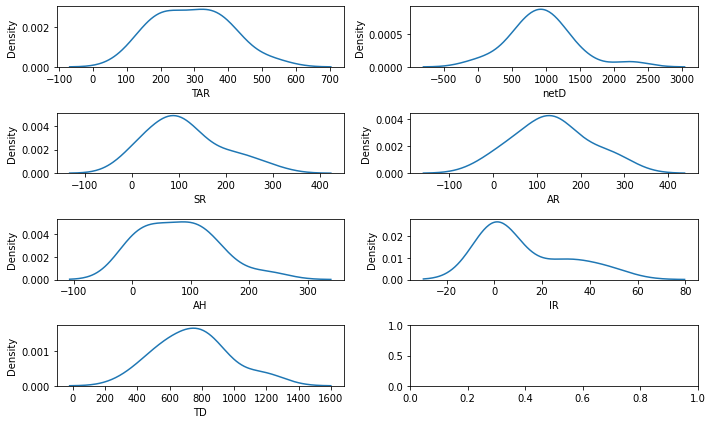

In [22]:
f, axs = plt.subplots(4,2,figsize=(10,6))
for k,a in enumerate(comb):
    sns.kdeplot(data=dcov_t,x=dcov_t.columns[3:][k],ax=axs[a])
f.tight_layout()


In [24]:
## analysis

### Exploring time trends

First, creating a datetime variable from `year`

In [23]:
dcov['date'] = pd.to_datetime(dcov['year'].astype(str), format='%Y')
dcov.head()

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,date
0,E08000026,Coventry,1992,127.0,NaN,102.0,NaN,25.0,NaN,230.0,1992-01-01
1,E08000026,Coventry,1993,331.0,NaN,231.0,NaN,100.0,NaN,390.0,1993-01-01
2,E08000026,Coventry,1994,474.0,NaN,378.0,NaN,96.0,NaN,330.0,1994-01-01
3,E08000026,Coventry,1995,371.0,NaN,271.0,NaN,100.0,NaN,490.0,1995-01-01
4,E08000026,Coventry,1996,315.0,NaN,203.0,NaN,112.0,NaN,530.0,1996-01-01


In [24]:
dcov_t = dcov[dcov.loc[:,'year']>2002].copy()

In [25]:
dcov_t.head()

,LA_code,LA,year,TAR,netD,SR,AR,AH,IR,TD,date
11,E08000026,Coventry,2003,320.0,624.0,218.0,NaN,102.0,NaN,810.0,2003-01-01
12,E08000026,Coventry,2004,111.0,-8.0,98.0,NaN,13.0,0.0,NaN,2004-01-01
13,E08000026,Coventry,2005,174.0,308.0,131.0,NaN,43.0,0.0,NaN,2005-01-01
14,E08000026,Coventry,2006,172.0,631.0,122.0,NaN,50.0,0.0,520.0,2006-01-01
15,E08000026,Coventry,2007,222.0,918.0,85.0,NaN,137.0,0.0,870.0,2007-01-01


Creating columns for affordable rent homes as a percentage of net dwellings

In [26]:
dcov_t['TAR_p'] = dcov_t['TAR']/dcov_t['netD']*100
dcov_t['SR_p'] = dcov_t['SR']/dcov_t['netD']*100
dcov_t['AR_p'] = dcov_t['AR']/dcov_t['netD']*100
for x in ['TAR_p','SR_p','AR_p']:
    dcov_t.loc[12,x] = pd.NA

Visualising delivery of housing in Coventry 

In [27]:
dcov_t['AR_req'] = 0.25*dcov_t.loc[dcov_t.year>2010,'TD']

Assuming that affordable housing should be 25% of net dwellings (in reality would only be 25% of _large_ developments). This is represented by the red line in the graph below.  

Text(0, 0.5, 'dwellings')

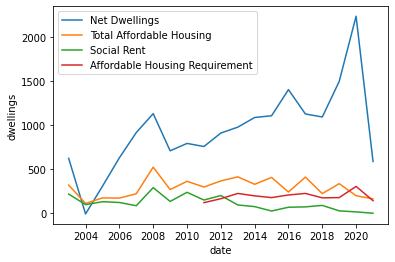

In [28]:
fig,ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='netD',data=dcov_t)
ax1 = sns.lineplot(x='date',y='TAR',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_req',data=dcov_t)
plt.legend(['Net Dwellings','Total Affordable Housing','Social Rent','Affordable Housing Requirement'])
plt.ylabel('dwellings')

Affordable housing delivery started off being greater than the actual delivery required but has shown a falling trend in recent years. Let's visualise the percentage of total housing made up by affordable housing, social rent, and affordable rent.

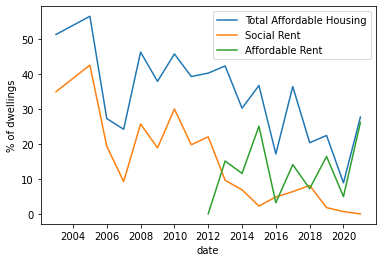

In [31]:
fig,ax = plt.subplots()
ax1 = sns.lineplot(x='date',y='TAR_p',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR_p',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_p',data=dcov_t)
plt.legend(['Total Affordable Housing','Social Rent','Affordable Rent'])
plt.ylabel('% of dwellings')
ax1.invert_yaxis()

Until 2012, socially rented housing made up the majority of the supply of affordable housing in Coventry. Since, 2012 while affordable rent supply has been rising, the delivery of socially rented has been falling making up only about 25% of the affordable housing delivery, and has nearly fallen to 0 in recent years. This implies that recent growth in affordable housing delivery is almost completely made up of affordable rent development. Therefore, while affordable housing requirements are being met as per Policy H6, social rent developments seem to be falling, this might explain the severe undersupply of socially rented properties in Coventry available through Homefinder.

In [30]:
dcov_t['SR/TAR'] = dcov_t['SR']/dcov_t['TAR']*100
dcov_t['AR/TAR'] = dcov_t['AR']/dcov_t['TAR']*100

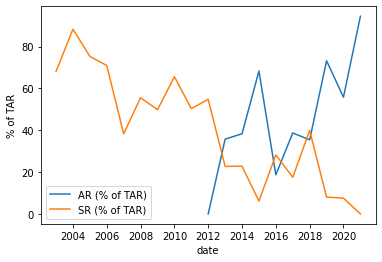

In [31]:
fig, ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='AR/TAR',data=dcov_t)
ax1 = sns.lineplot(x='date',y='SR/TAR',data=dcov_t)
plt.ylabel('% of TAR')
plt.legend(['AR (% of TAR)','SR (% of TAR)'])

This confirms that affordable rent makes up nearly the entirety of affordable housing provision currently

What about the delivery of affordable housing compared to the 25% requirement?

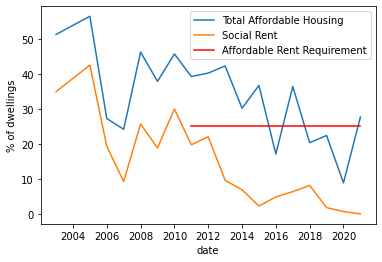

In [32]:
dcov_t['AR_req/netD'] = 25
fig,ax = plt.subplots()
ax1 = sns.lineplot(x='date',y='TAR_p',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR_p',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_req/netD',data=dcov_t[dcov_t.loc[:,'year']>=2011],color='red')
plt.legend(['Total Affordable Housing','Social Rent','Affordable Rent Requirement'])
plt.ylabel('% of dwellings')
ax1.invert_yaxis()

It seems like the 25% affordable housing requirement is being met for most years since 2011, except for the significant dip in 2020, which is attributed to delays in development from the COVID-19 pandemic and subsequent lockdowns according to the Authority Monitoring Report 2020/21. Again, we point out the significant drop in social rented properties since 2011. 

The Local Plan recommends an annual growth of 348 additional affordable homes per year to meet their affordable housing need. Similarly, it assesses that between 2011-2016, annual growth of total dwellings should be 1,020 homes per annum, and from 2017-2031, annual growth should increase to 1,300 homes per annum. 

In [41]:
for x in dcov_t.index:
    if dcov_t.loc[x,'year'] in range(2011,2017):
        dcov_t.loc[x,'AR_set'] = 348
        dcov_t.loc[x,'netD_set'] = 1020
    elif dcov_t.loc[x,'year'] >= 2017:
        dcov_t.loc[x,'netD_set'] = 1300
        dcov_t.loc[x,'AR_set'] = 348

Text(0, 0.5, 'dwellings')

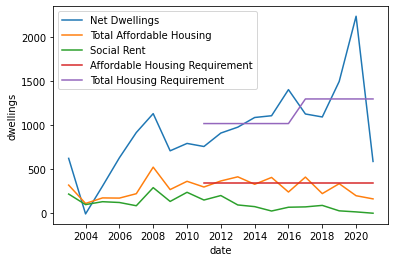

In [44]:
fig,ax = plt.subplots()
ax0 = sns.lineplot(x='date',y='netD',data=dcov_t)
ax1 = sns.lineplot(x='date',y='TAR',data=dcov_t)
ax2 = sns.lineplot(x='date',y='SR',data=dcov_t)
ax3 = sns.lineplot(x='date',y='AR_set',data=dcov_t)
ax4 = sns.lineplot(x='date',y='netD_set',data=dcov_t)
#ax4 = sns.lineplot(x='date',y='AR_req',data=dcov_t)
plt.legend(['Net Dwellings','Total Affordable Housing','Social Rent','Affordable Housing Requirement','Total Housing Requirement'])
plt.ylabel('dwellings')

While delivery is above the 25% requirement, affordable housing delivery is still under the assessed 348 homes/year needed to meet Coventry's affordable housing needs. Let's evaluate by how much.

In [47]:
dcov_t['TAR_deficit'] = dcov_t['TAR'] - dcov_t['AR_set']
dcov_t['netD_deficit'] = dcov_t['netD'] - dcov_t['netD_set']

In [51]:
print('Average number of affordable houses v. assessed need: ',dcov_t['TAR_deficit'].mean())
print('Average number of total dwellings v. assessed need: ',dcov_t['netD_deficit'].mean())

Average number of affordable houses v. requirement:  -40.0
Average number of total dwellings v. requirement:  17.0


On average, affordable housing is 40 homes below the needed 348 homes per year assessed by the Local Plan. On the other hand, total dwellings are above the assessed need at an average of 17 homes per year. While in some years, there was a deficit in total housing supply, prior years' surplus helped to make up up for any deficits. 

In [52]:
dcov_t['TAR_deficit_a'] = dcov_t['TAR'] - dcov_t['AR_req']

In [53]:
print('Average number of affordable houses v. 25% requirement: ',dcov_t['TAR_deficit_a'].mean())

Average number of affordable houses v. 25% requirement:  115.5


If instead looking at actual 25% requirement, affordable housing overdelivers by 115 homes per year on average.